In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Define the coefficients functions
def calculate_A0(Smax_sigma_0, alpha):
    return (0.825 - 0.34 * alpha + 0.05 * alpha**2) * (np.cos(np.pi * Smax_sigma_0 / 2))**(1 / alpha)

def calculate_A1(Smax_sigma_0, alpha):
    return (0.415 - 0.071 * alpha) * (Smax_sigma_0)

def calculate_A2(A0, A1, A3):
    return 1 - A0 - A1 - A3

def calculate_A3(A0, A1):
    return 2 * A0 + A1 - 1

# Define the normalized crack opening stress function
def normalized_crack_opening_stress(R, Smax_sigma_0, alpha):
    A0 = calculate_A0(Smax_sigma_0, alpha)
    A1 = calculate_A1(Smax_sigma_0, alpha)
    A3 = calculate_A3(A1, A0)
    A2 = calculate_A2(A0, A1, A3)


    So_Smax = np.where(
        R >= 0,
        A0 + A1 * R + A2 * R**2 + A3 * R**3,
        A0 + A1 * R
    )
    return So_Smax

In [8]:
# Plotting function for a single alpha value
def plot_crack_opening_stress(alpha, Smax_sigma0_values, R_values):
    plt.figure(figsize=(10, 6))

    for Smax_sigma0 in Smax_sigma0_values:
        So_Smax_values = normalized_crack_opening_stress(R_values, Smax_sigma0, alpha)
        plt.plot(R_values, So_Smax_values, label=f'Smax/σ0={Smax_sigma0}')

    plt.axvline(x=0, color='black', linestyle='-')
    plt.xlabel('Stress ratio R=Smin/Smax')
    plt.ylabel('So/Smax')
    plt.legend()
    plt.title(f'Normalized crack opening stress under constant amplitude loading (α={alpha})')
    plt.grid(True)
    plt.ylim(0, 1)
    plt.xlim(-1, 1)
    plt.show()

In [4]:
# Define the parameters
R_values = np.linspace(-1, 1, 200)
Smax_sigma0_values = [0.0, 0.2, 0.4, 0.6]
alpha_values = [1, 2, 3]

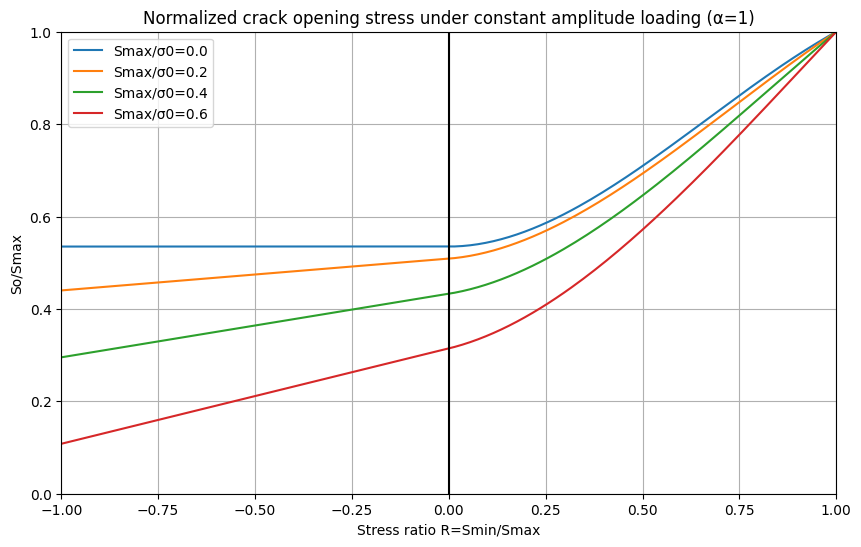

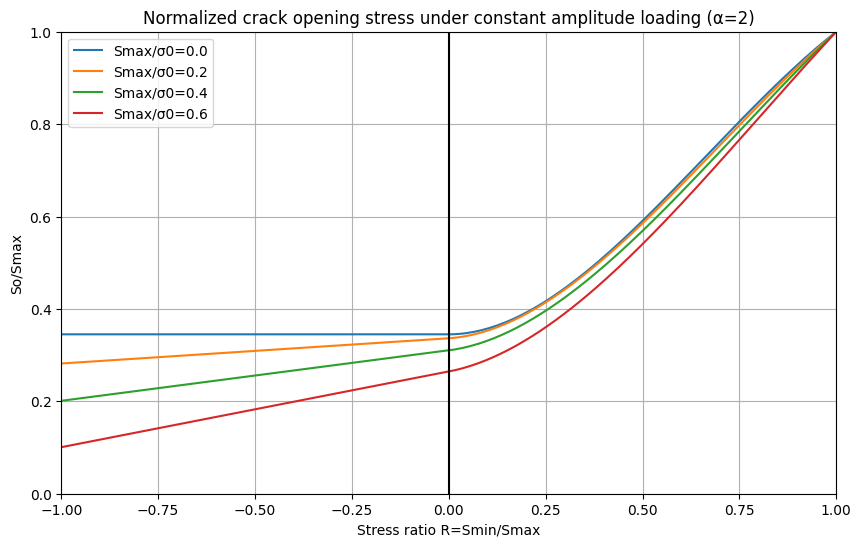

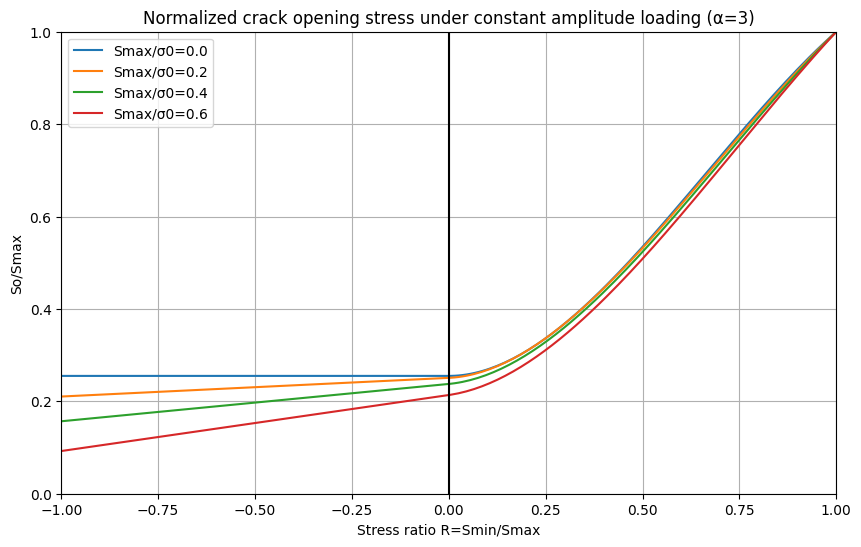

In [9]:
# Generate the plots for each alpha value
for alpha in alpha_values:
    plot_crack_opening_stress(alpha, Smax_sigma0_values, R_values)